<a href="https://colab.research.google.com/github/lennythecreator/AI-Model/blob/main/Customer_Segmentation_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer_data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
customer_dataset = pd.DataFrame(customer_data)
customer_dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Getting feature data types

In [3]:
customer_dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Renaming missplet values in the dataset

In [4]:
customer_dataset.rename(columns={'Genre':'Gender'}, inplace=True)

# Finding the ages of customer

In [5]:
customer_ages= pd.DataFrame(customer_dataset['Age'].value_counts()).T
pd.set_option('display.max_columns',100)
customer_ages

Age,32,35,19,31,30,49,40,38,47,27,36,23,34,20,29,50,48,21,24,18,28,67,59,54,43,60,45,39,33,37,22,25,46,68,52,44,66,57,26,53,42,63,70,51,58,65,41,55,69,64,56
count,11,9,8,8,7,7,6,6,6,6,6,6,5,5,5,5,5,5,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1


In [6]:
customer_dataset['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [7]:
customer_dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
customer_dataset.drop(['CustomerID'],axis=1,inplace=True)
customer_dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Visualizing our Data

<function matplotlib.pyplot.show(close=None, block=None)>

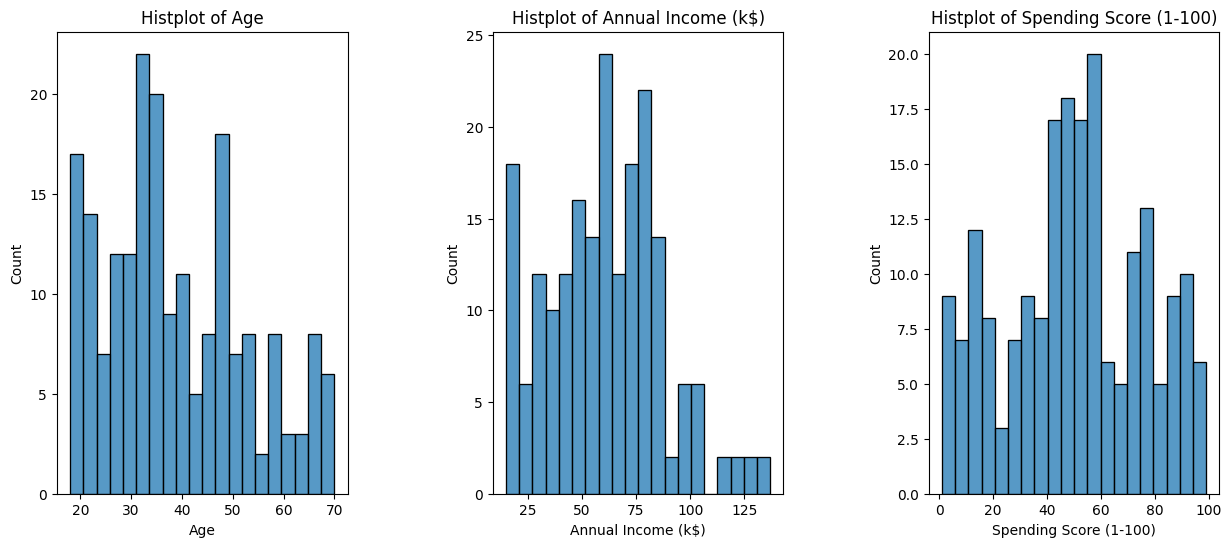

In [9]:
plt.figure(1, figsize=(15,6))
n = 0
for x in ['Age','Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  sns.histplot(customer_dataset[x], bins = 20 )
  plt.title('Histplot of {}'.format(x))
plt.show

<Axes: xlabel='count', ylabel='Gender'>

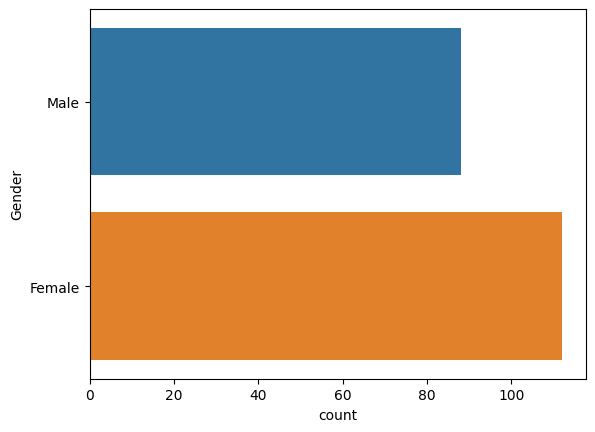

In [10]:
sns.countplot(y='Gender', data=customer_dataset, hue='Gender')

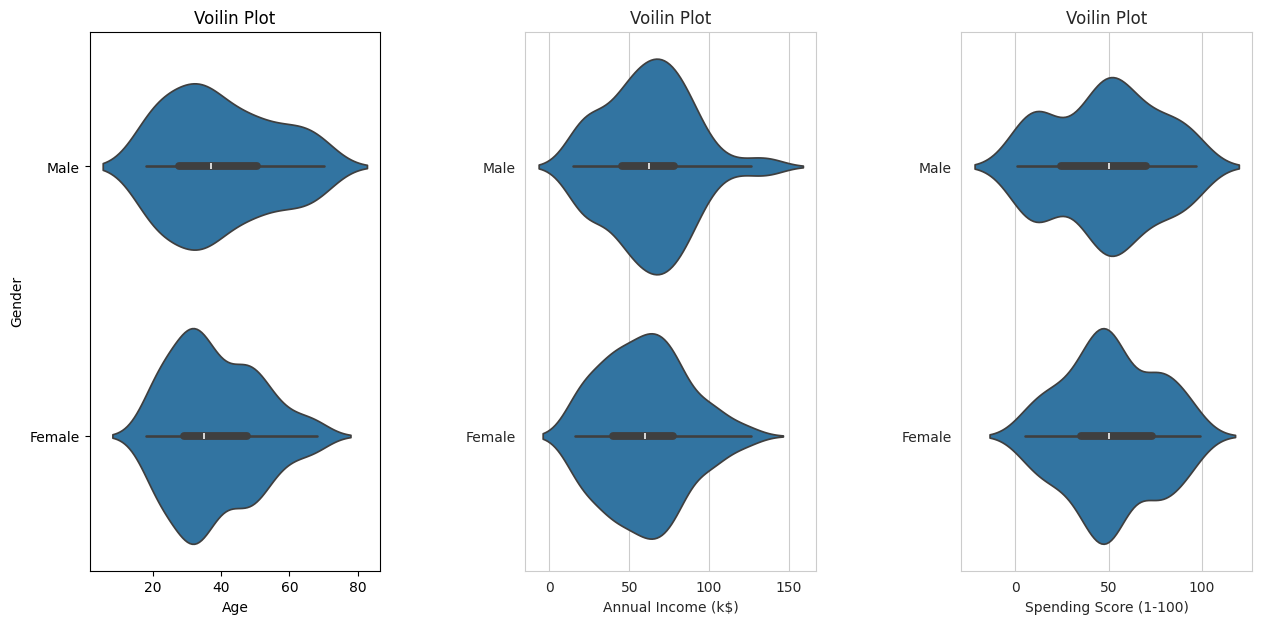

In [11]:
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age','Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  sns.set_style(style="whitegrid")
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  sns.violinplot(x=cols,y='Gender', data=customer_dataset)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Voilin Plot')
plt.show()

<ipython-input-12-79ad7bd724a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ages_x,y=ages_y,palette='mako')


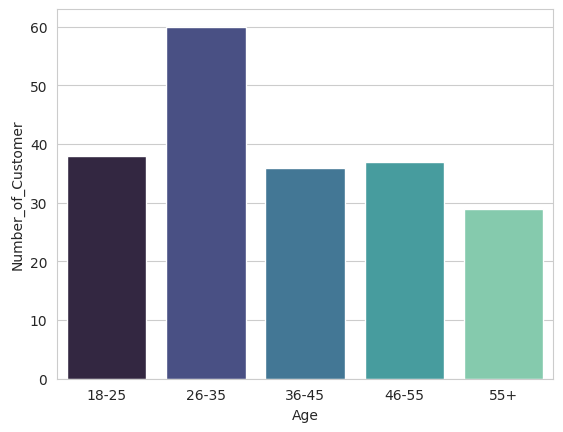

In [12]:
age_18_to_25= customer_dataset.Age[(customer_dataset.Age >= 18) & (customer_dataset.Age <=25)]
age_26_to_35= customer_dataset.Age[(customer_dataset.Age >= 26) & (customer_dataset.Age <=35)]
age_36_to_45= customer_dataset.Age[(customer_dataset.Age >= 36) & (customer_dataset.Age <=45)]
age_46_to_55= customer_dataset.Age[(customer_dataset.Age >= 46) & (customer_dataset.Age <=55)]
age_above_55 = customer_dataset.Age[customer_dataset.Age >= 56]

ages_x = ['18-25','26-35','36-45','46-55', '55+']
ages_y = [len(age_18_to_25.values),len(age_26_to_35.values),len(age_36_to_45.values),len(age_46_to_55.values),len(age_above_55.values)]
sns.barplot(x=ages_x,y=ages_y,palette='mako')
plt.xlabel('Age')
plt.ylabel('Number_of_Customer')
plt.show()

## Finding relationship between Income and Spending Score

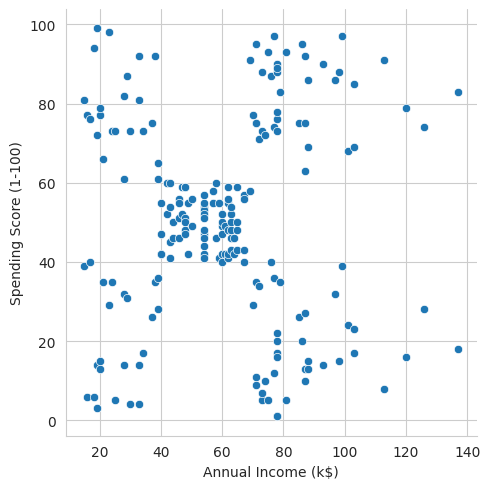

In [13]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_dataset)

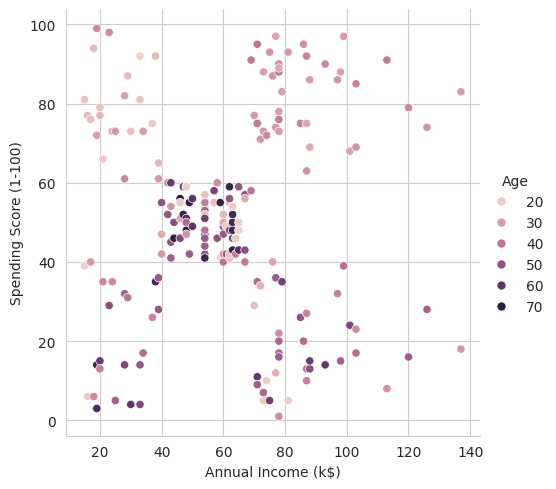

In [14]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_dataset,hue='Age')

## Visualization of customer spending

<ipython-input-16-887218c97098>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ss_x,y=ss_y, palette='mako')


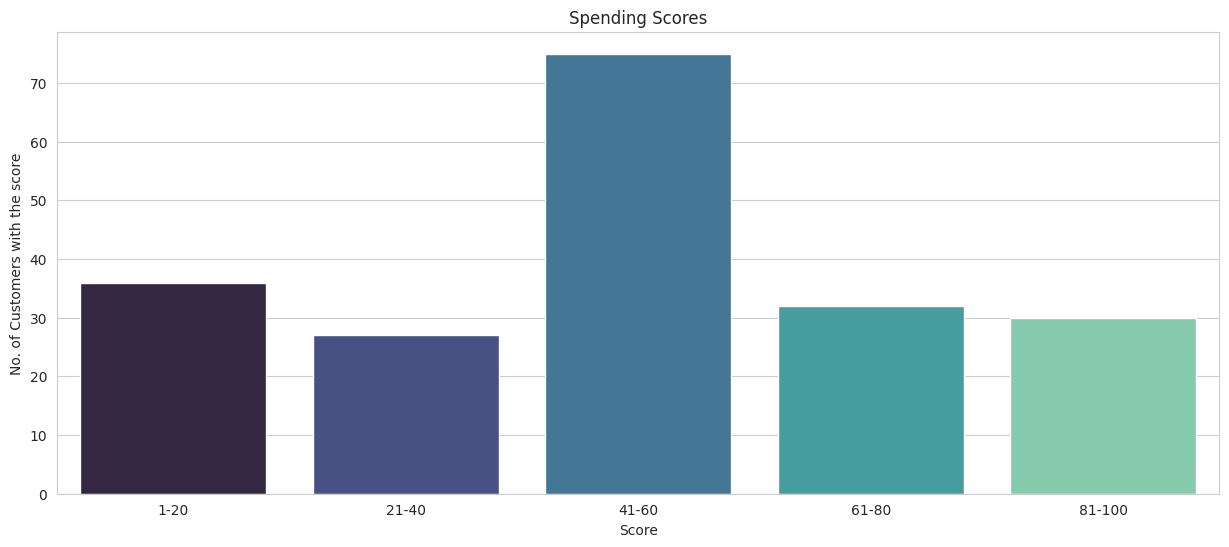

In [16]:
s_score_1_to_20 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >=1 ) & (customer_dataset['Spending Score (1-100)'] <=20 )]
s_score_21_to_40 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >=21 ) & (customer_dataset['Spending Score (1-100)'] <=40 )]
s_score_41_to_60 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >=41 ) & (customer_dataset['Spending Score (1-100)'] <=60 )]
s_score_61_to_80 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >=61 ) & (customer_dataset['Spending Score (1-100)'] <=80 )]
s_score_81_to_100 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >=81 ) & (customer_dataset['Spending Score (1-100)'] <=100 )]

ss_x = ['1-20','21-40','41-60','61-80','81-100']
ss_y = [len(s_score_1_to_20),len(s_score_21_to_40),len(s_score_41_to_60),len(s_score_61_to_80),len(s_score_81_to_100)]

plt.figure(figsize=(15,6))
sns.barplot(x=ss_x,y=ss_y, palette='mako')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('No. of Customers with the score')
plt.show()


## Visualization of customer income groups

<ipython-input-22-a0c3d9b0f116>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_x,y=income_y, palette='mako')


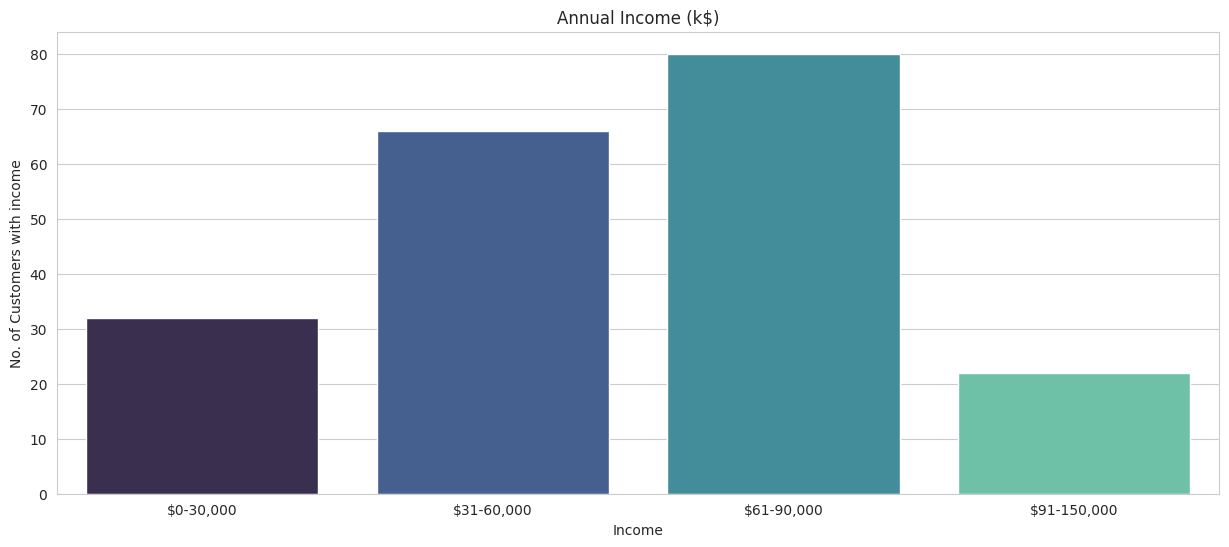

In [22]:
income_30 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)']>=0)&(customer_dataset['Annual Income (k$)']<=30)]
income_60 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)']>=31)&(customer_dataset['Annual Income (k$)']<=60)]
income_90 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)']>=61)&(customer_dataset['Annual Income (k$)']<=90)]
income_150 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)']>=91)&(customer_dataset['Annual Income (k$)']<=150)]

income_x = ['$0-30,000','$31-60,000','$61-90,000','$91-150,000']
income_y = [len(income_30),len(income_60),len(income_90),len(income_150)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x,y=income_y, palette='mako')
plt.title('Annual Income (k$)')
plt.xlabel('Income')
plt.ylabel('No. of Customers with income')
plt.show()

# Calling the Model to segment customers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

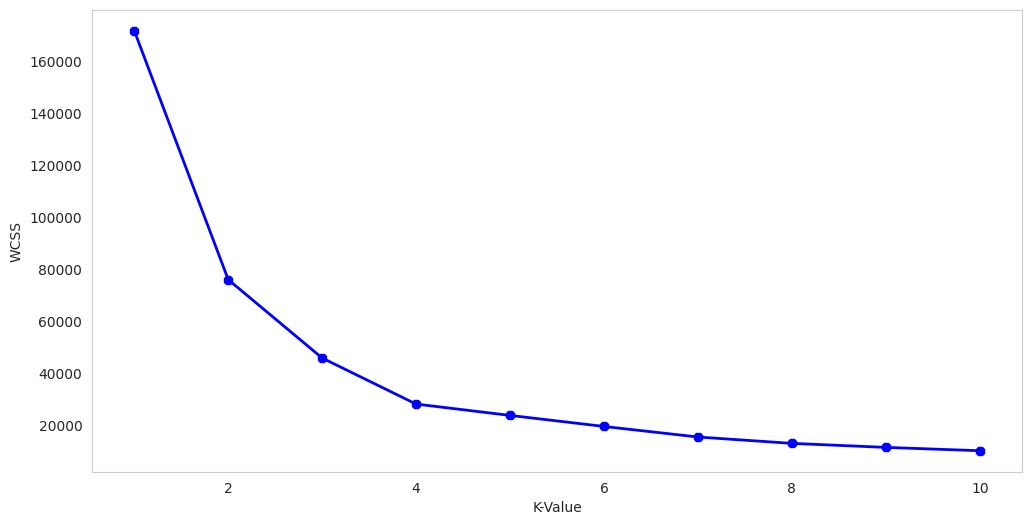

In [25]:
x1 = customer_dataset.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters= k, init = "k-means++")
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker="8")
plt.xlabel("K-Value")
plt.ylabel("WCSS")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=4)
label  = kmeans.fit_predict(x1)
label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [28]:
kmeans.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [27.61702128, 49.14893617]])

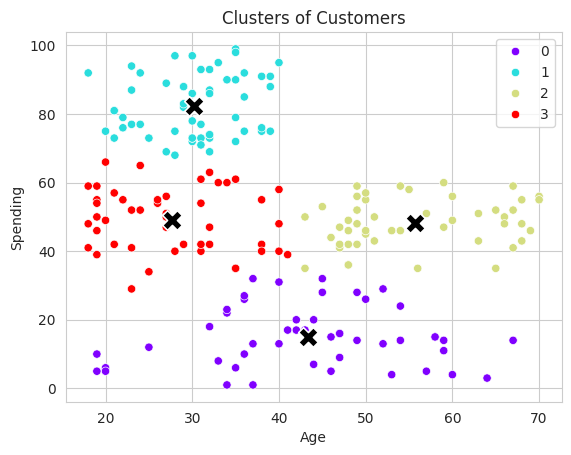

In [36]:
sns.scatterplot(x=x1[:,0], y=x1[:,1], hue=kmeans.labels_, palette='rainbow', legend='full')
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color='black', s=200, marker='X', edgecolor='w', legend=False)
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

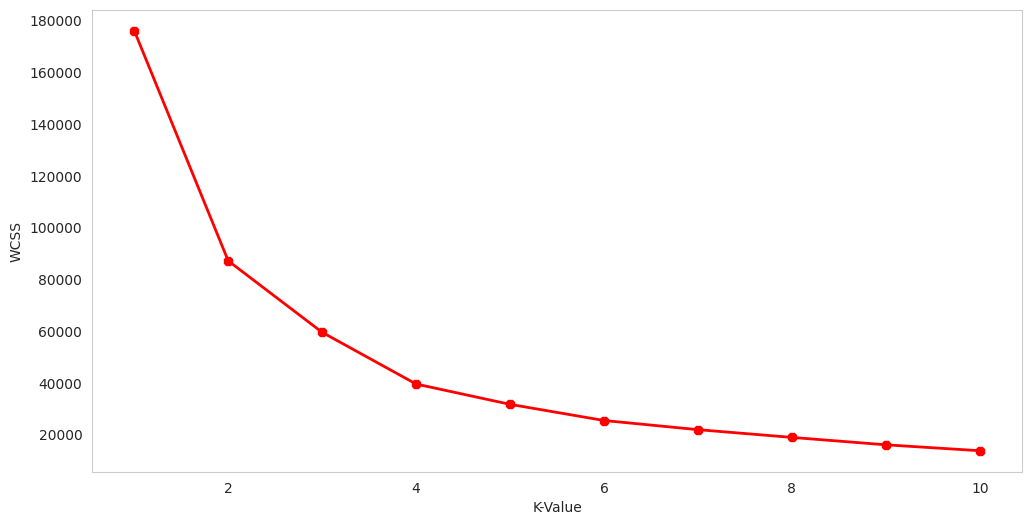

In [38]:
x2 = customer_dataset.loc[:,['Age','Annual Income (k$)']].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters= k, init = "k-means++")
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("K-Value")
plt.ylabel("WCSS")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4)
label  = kmeans.fit_predict(x2)
label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [40]:
kmeans.cluster_centers_

array([[ 39.        , 106.5       ],
       [ 28.82608696,  29.41304348],
       [ 55.70175439,  50.47368421],
       [ 31.95890411,  72.95890411]])

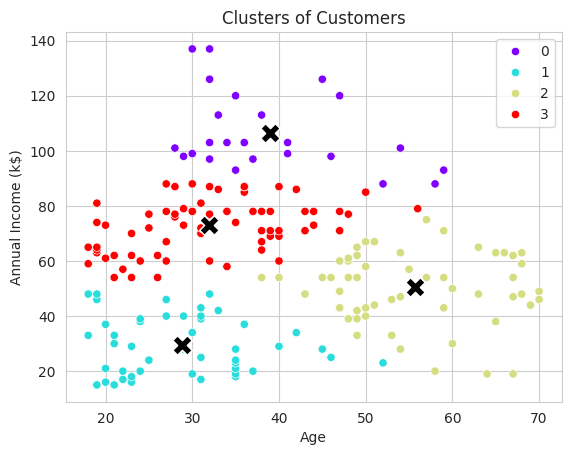

In [41]:
sns.scatterplot(x=x2[:,0], y=x2[:,1], hue=kmeans.labels_, palette='rainbow', legend='full')
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color='black', s=200, marker='X', edgecolor='w', legend=False)
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [42]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)